In [19]:
rawCounts <- read.delim("20210113-featureCounts-H23-RTK.tsv")
head(rawCounts)

,X,Geneid,gene_name,ES23NTXX01,ES23NTXX02,ES23NTXX03,ES23NTXX04,ES23S1XX01,ES23S1XX02,ES23S1XX03,⋯,ES23S2MB03,ES23S2MB04,ES23NTXB01,ES23NTXB02,ES23NTXB03,ES23NTXB04,ES23S2XB01,ES23S2XB02,ES23S2XB03,ES23S2XB04
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,529,ENSG00000142627,EPHA2,5807,6300,5436,5756,6155,6063,5092,⋯,4926,5049,5054,4571,6482,5895,6273,5074,6552,6455
2,715,ENSG00000133216,EPHB2,320,328,309,335,386,369,341,⋯,424,376,324,230,376,309,317,287,395,409
3,1190,ENSG00000183317,EPHA10,437,441,460,514,497,501,517,⋯,811,796,747,640,779,688,695,654,845,836
4,1348,ENSG00000066056,TIE1,0,0,1,1,4,1,0,⋯,1,1,0,1,3,2,2,1,3,3
5,1828,ENSG00000185483,ROR1,126,157,122,154,233,187,228,⋯,303,258,193,120,216,179,270,258,337,300
6,3680,ENSG00000162733,DDR2,23,24,15,16,22,13,16,⋯,24,15,9,15,15,20,18,22,28,24


In [20]:
sampleData <- read.delim("20201027-H23-experiment-design.tsv")
head(sampleData)

,X,SampleID.Lab,Cell.Line,Inhibition.Status,CRISPR,MRTX,BI,SHP2i,Time.Point,Population
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,0,ES23NTXX01,23,NTXX,NT,False,False,False,0,A
2,1,ES23NTXX02,23,NTXX,NT,False,False,False,0,A
3,2,ES23NTXX03,23,NTXX,NT,False,False,False,0,B
4,3,ES23NTXX04,23,NTXX,NT,False,False,False,0,B
5,4,ES23S1XX01,23,S1XX,S1,False,False,False,0,A
6,5,ES23S1XX02,23,S1XX,S1,False,False,False,0,A


In [21]:
sampleData_v2 <- sampleData

In [22]:
geneID <- rawCounts$gene_name
sampleIndex <- grepl("ES\\d+", colnames(rawCounts))
rawCounts <- as.matrix(rawCounts[,sampleIndex])
rownames(rawCounts) <- geneID
head(rawCounts)

,ES23NTXX01,ES23NTXX02,ES23NTXX03,ES23NTXX04,ES23S1XX01,ES23S1XX02,ES23S1XX03,ES23S1XX04,ES23S2XX01,ES23S2XX02,⋯,ES23S2MB03,ES23S2MB04,ES23NTXB01,ES23NTXB02,ES23NTXB03,ES23NTXB04,ES23S2XB01,ES23S2XB02,ES23S2XB03,ES23S2XB04
EPHA2,5807,6300,5436,5756,6155,6063,5092,5654,6031,6740,⋯,4926,5049,5054,4571,6482,5895,6273,5074,6552,6455
EPHB2,320,328,309,335,386,369,341,296,312,307,⋯,424,376,324,230,376,309,317,287,395,409
EPHA10,437,441,460,514,497,501,517,522,517,505,⋯,811,796,747,640,779,688,695,654,845,836
TIE1,0,0,1,1,4,1,0,4,2,0,⋯,1,1,0,1,3,2,2,1,3,3
ROR1,126,157,122,154,233,187,228,203,305,284,⋯,303,258,193,120,216,179,270,258,337,300
DDR2,23,24,15,16,22,13,16,20,18,16,⋯,24,15,9,15,15,20,18,22,28,24


In [23]:
rownames(sampleData) <- sampleData$SampleID.Lab
head(sampleData)

,X,SampleID.Lab,Cell.Line,Inhibition.Status,CRISPR,MRTX,BI,SHP2i,Time.Point,Population
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
ES23NTXX01,0,ES23NTXX01,23,NTXX,NT,False,False,False,0,A
ES23NTXX02,1,ES23NTXX02,23,NTXX,NT,False,False,False,0,A
ES23NTXX03,2,ES23NTXX03,23,NTXX,NT,False,False,False,0,B
ES23NTXX04,3,ES23NTXX04,23,NTXX,NT,False,False,False,0,B
ES23S1XX01,4,ES23S1XX01,23,S1XX,S1,False,False,False,0,A
ES23S1XX02,5,ES23S1XX02,23,S1XX,S1,False,False,False,0,A


In [24]:
rawCounts <- rawCounts[,unique(rownames(sampleData))]
all(colnames(rawCounts) == rownames(sampleData))

[1] TRUE

In [25]:
sampleData$Cell.Line <- factor(sampleData$Cell.Line)
sampleData$Time.Point <- factor(sampleData$Time.Point)
head(sampleData)

,X,SampleID.Lab,Cell.Line,Inhibition.Status,CRISPR,MRTX,BI,SHP2i,Time.Point,Population
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
ES23NTXX01,0,ES23NTXX01,23,NTXX,NT,False,False,False,0,A
ES23NTXX02,1,ES23NTXX02,23,NTXX,NT,False,False,False,0,A
ES23NTXX03,2,ES23NTXX03,23,NTXX,NT,False,False,False,0,B
ES23NTXX04,3,ES23NTXX04,23,NTXX,NT,False,False,False,0,B
ES23S1XX01,4,ES23S1XX01,23,S1XX,S1,False,False,False,0,A
ES23S1XX02,5,ES23S1XX02,23,S1XX,S1,False,False,False,0,A


In [26]:
library("DESeq2")
dds <- DESeqDataSetFromMatrix(countData=rawCounts, colData=sampleData, design= ~ CRISPR + Time.Point)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“7 duplicate rownames were renamed by adding numbers”


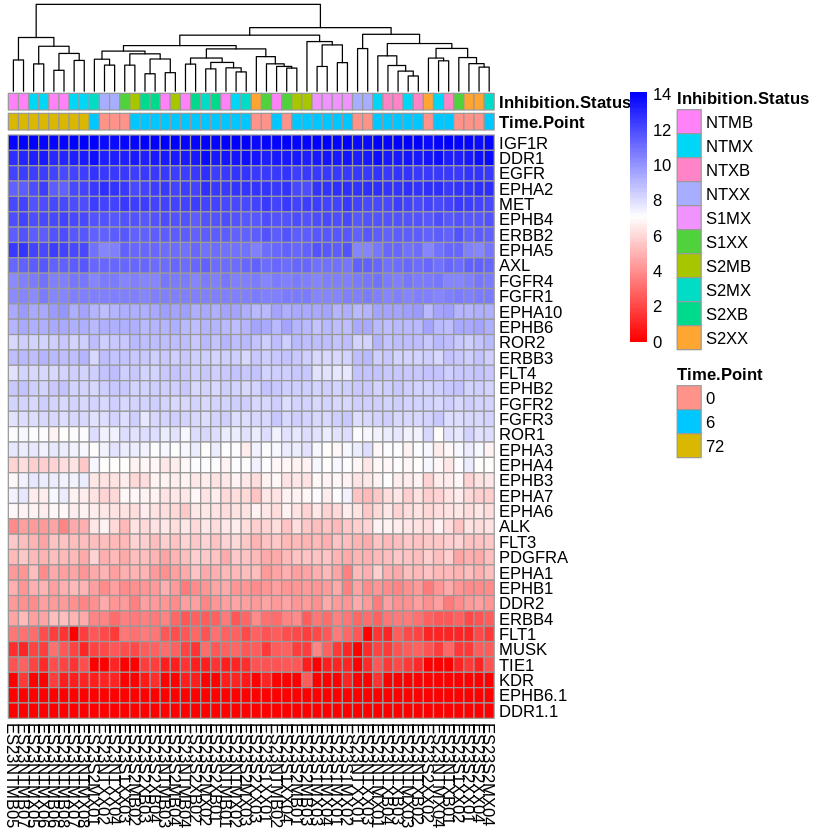

In [27]:
library("pheatmap")
select <- order(rowMeans(counts(dds,normalized=FALSE)),
                decreasing=TRUE)[1:38]
df <- as.data.frame(colData(dds)[,c("Time.Point","Inhibition.Status")])
ntd <- normTransform(dds)
pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=TRUE,
         cluster_cols=TRUE, annotation_col=df, color = colorRampPalette(c("red", "white", "blue"))(100))

In [ ]:
#RTK ligand

In [28]:
rawCounts <- read.delim("20210113-featureCounts-H23-RTK_lig.tsv")
head(rawCounts)

,X,Geneid,gene_name,ES23NTXX01,ES23NTXX02,ES23NTXX03,ES23NTXX04,ES23S1XX01,ES23S1XX02,ES23S1XX03,⋯,ES23S2MB03,ES23S2MB04,ES23NTXB01,ES23NTXB02,ES23NTXB03,ES23NTXB04,ES23S2XB01,ES23S2XB02,ES23S2XB03,ES23S2XB04
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2655,ENSG00000134259,NGF,69,69,86,69,91,84,77,⋯,54,70,70,65,71,67,84,66,60,47
2,3339,ENSG00000243364,EFNA4,730,604,490,479,708,689,627,⋯,975,938,792,515,764,678,708,717,1033,909
3,3340,ENSG00000143590,EFNA3,884,735,645,588,590,639,655,⋯,806,894,827,655,825,849,602,740,928,780
4,3341,ENSG00000251246,EFNA3,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,3343,ENSG00000169242,EFNA1,2997,3121,2600,2608,3765,3637,3137,⋯,8054,6959,5482,4240,5796,5463,5876,5447,7279,6759
6,7133,ENSG00000107831,FGF8,0,2,3,1,1,1,2,⋯,2,1,0,0,1,1,2,1,2,0


In [29]:
sampleData <- read.delim("20201027-H23-experiment-design.tsv")
head(sampleData)

,X,SampleID.Lab,Cell.Line,Inhibition.Status,CRISPR,MRTX,BI,SHP2i,Time.Point,Population
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,0,ES23NTXX01,23,NTXX,NT,False,False,False,0,A
2,1,ES23NTXX02,23,NTXX,NT,False,False,False,0,A
3,2,ES23NTXX03,23,NTXX,NT,False,False,False,0,B
4,3,ES23NTXX04,23,NTXX,NT,False,False,False,0,B
5,4,ES23S1XX01,23,S1XX,S1,False,False,False,0,A
6,5,ES23S1XX02,23,S1XX,S1,False,False,False,0,A


In [30]:
sampleData_v2 <- sampleData

In [31]:
geneID <- rawCounts$gene_name
sampleIndex <- grepl("ES\\d+", colnames(rawCounts))
rawCounts <- as.matrix(rawCounts[,sampleIndex])
rownames(rawCounts) <- geneID
head(rawCounts)

,ES23NTXX01,ES23NTXX02,ES23NTXX03,ES23NTXX04,ES23S1XX01,ES23S1XX02,ES23S1XX03,ES23S1XX04,ES23S2XX01,ES23S2XX02,⋯,ES23S2MB03,ES23S2MB04,ES23NTXB01,ES23NTXB02,ES23NTXB03,ES23NTXB04,ES23S2XB01,ES23S2XB02,ES23S2XB03,ES23S2XB04
NGF,69,69,86,69,91,84,77,88,56,99,⋯,54,70,70,65,71,67,84,66,60,47
EFNA4,730,604,490,479,708,689,627,661,553,504,⋯,975,938,792,515,764,678,708,717,1033,909
EFNA3,884,735,645,588,590,639,655,707,529,551,⋯,806,894,827,655,825,849,602,740,928,780
EFNA3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
EFNA1,2997,3121,2600,2608,3765,3637,3137,3259,3175,3319,⋯,8054,6959,5482,4240,5796,5463,5876,5447,7279,6759
FGF8,0,2,3,1,1,1,2,2,1,0,⋯,2,1,0,0,1,1,2,1,2,0


In [32]:
rownames(sampleData) <- sampleData$SampleID.Lab
head(sampleData)

,X,SampleID.Lab,Cell.Line,Inhibition.Status,CRISPR,MRTX,BI,SHP2i,Time.Point,Population
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
ES23NTXX01,0,ES23NTXX01,23,NTXX,NT,False,False,False,0,A
ES23NTXX02,1,ES23NTXX02,23,NTXX,NT,False,False,False,0,A
ES23NTXX03,2,ES23NTXX03,23,NTXX,NT,False,False,False,0,B
ES23NTXX04,3,ES23NTXX04,23,NTXX,NT,False,False,False,0,B
ES23S1XX01,4,ES23S1XX01,23,S1XX,S1,False,False,False,0,A
ES23S1XX02,5,ES23S1XX02,23,S1XX,S1,False,False,False,0,A


In [33]:
rawCounts <- rawCounts[,unique(rownames(sampleData))]
all(colnames(rawCounts) == rownames(sampleData))

[1] TRUE

In [34]:
sampleData$Cell.Line <- factor(sampleData$Cell.Line)
sampleData$Time.Point <- factor(sampleData$Time.Point)
head(sampleData)

,X,SampleID.Lab,Cell.Line,Inhibition.Status,CRISPR,MRTX,BI,SHP2i,Time.Point,Population
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
ES23NTXX01,0,ES23NTXX01,23,NTXX,NT,False,False,False,0,A
ES23NTXX02,1,ES23NTXX02,23,NTXX,NT,False,False,False,0,A
ES23NTXX03,2,ES23NTXX03,23,NTXX,NT,False,False,False,0,B
ES23NTXX04,3,ES23NTXX04,23,NTXX,NT,False,False,False,0,B
ES23S1XX01,4,ES23S1XX01,23,S1XX,S1,False,False,False,0,A
ES23S1XX02,5,ES23S1XX02,23,S1XX,S1,False,False,False,0,A


In [35]:
library("DESeq2")
dds <- DESeqDataSetFromMatrix(countData=rawCounts, colData=sampleData, design= ~ CRISPR + Time.Point)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“4 duplicate rownames were renamed by adding numbers”


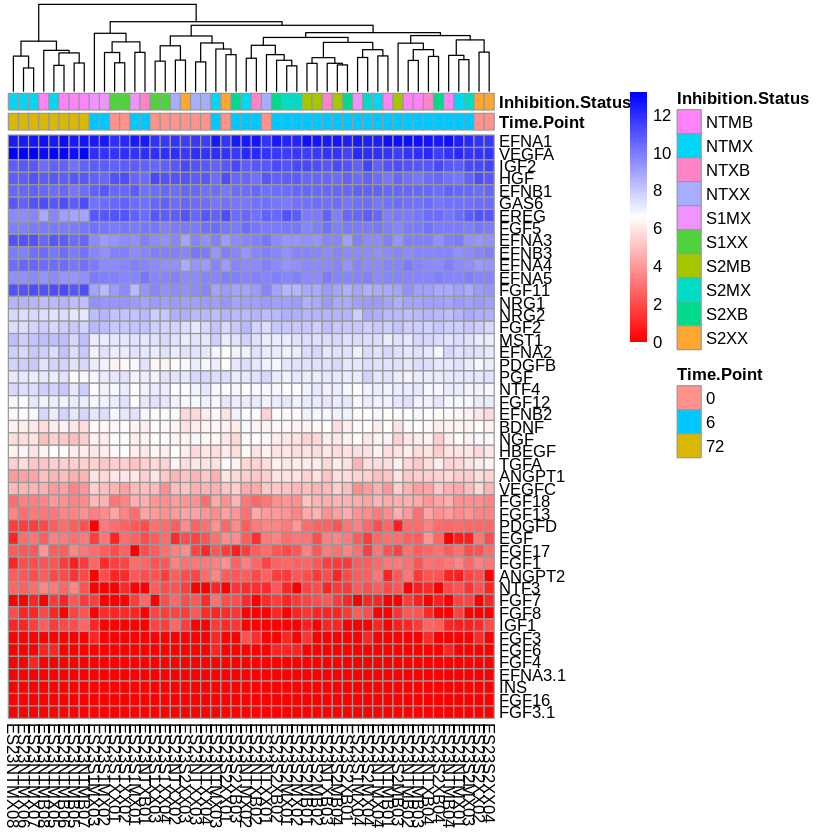

In [36]:
library("pheatmap")
select <- order(rowMeans(counts(dds,normalized=FALSE)),
                decreasing=TRUE)[1:47]
df <- as.data.frame(colData(dds)[,c("Time.Point","Inhibition.Status")])
ntd <- normTransform(dds)
pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=TRUE,
         cluster_cols=TRUE, annotation_col=df, color = colorRampPalette(c("red", "white", "blue"))(100))

In [ ]:
#ERK

In [47]:
rawCounts <- read.delim("20210113-featureCounts-H23-ERK.tsv")
head(rawCounts)

,X,Geneid,gene_name,ES23NTXX01,ES23NTXX02,ES23NTXX03,ES23NTXX04,ES23S1XX01,ES23S1XX02,ES23S1XX03,⋯,ES23S2MB03,ES23S2MB04,ES23NTXB01,ES23NTXB02,ES23NTXB03,ES23NTXB04,ES23S2XB01,ES23S2XB02,ES23S2XB03,ES23S2XB04
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,635,ENSG00000188784,PLA2G2E,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,637,ENSG00000188257,PLA2G2A,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,638,ENSG00000127472,PLA2G5,0,0,1,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,639,ENSG00000117215,PLA2G2D,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,640,ENSG00000158786,PLA2G2F,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,642,ENSG00000187980,PLA2G2C,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [48]:
sampleData <- read.delim("20201027-H23-experiment-design.tsv")
head(sampleData)

,X,SampleID.Lab,Cell.Line,Inhibition.Status,CRISPR,MRTX,BI,SHP2i,Time.Point,Population
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,0,ES23NTXX01,23,NTXX,NT,False,False,False,0,A
2,1,ES23NTXX02,23,NTXX,NT,False,False,False,0,A
3,2,ES23NTXX03,23,NTXX,NT,False,False,False,0,B
4,3,ES23NTXX04,23,NTXX,NT,False,False,False,0,B
5,4,ES23S1XX01,23,S1XX,S1,False,False,False,0,A
6,5,ES23S1XX02,23,S1XX,S1,False,False,False,0,A


In [49]:
sampleData_v2 <- sampleData

In [50]:
geneID <- rawCounts$gene_name
sampleIndex <- grepl("ES\\d+", colnames(rawCounts))
rawCounts <- as.matrix(rawCounts[,sampleIndex])
rownames(rawCounts) <- geneID
head(rawCounts)

,ES23NTXX01,ES23NTXX02,ES23NTXX03,ES23NTXX04,ES23S1XX01,ES23S1XX02,ES23S1XX03,ES23S1XX04,ES23S2XX01,ES23S2XX02,⋯,ES23S2MB03,ES23S2MB04,ES23NTXB01,ES23NTXB02,ES23NTXB03,ES23NTXB04,ES23S2XB01,ES23S2XB02,ES23S2XB03,ES23S2XB04
PLA2G2E,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PLA2G2A,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PLA2G5,0,0,1,2,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
PLA2G2D,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PLA2G2F,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PLA2G2C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [51]:
rownames(sampleData) <- sampleData$SampleID.Lab
head(sampleData)

,X,SampleID.Lab,Cell.Line,Inhibition.Status,CRISPR,MRTX,BI,SHP2i,Time.Point,Population
,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
ES23NTXX01,0,ES23NTXX01,23,NTXX,NT,False,False,False,0,A
ES23NTXX02,1,ES23NTXX02,23,NTXX,NT,False,False,False,0,A
ES23NTXX03,2,ES23NTXX03,23,NTXX,NT,False,False,False,0,B
ES23NTXX04,3,ES23NTXX04,23,NTXX,NT,False,False,False,0,B
ES23S1XX01,4,ES23S1XX01,23,S1XX,S1,False,False,False,0,A
ES23S1XX02,5,ES23S1XX02,23,S1XX,S1,False,False,False,0,A


In [52]:
rawCounts <- rawCounts[,unique(rownames(sampleData))]
all(colnames(rawCounts) == rownames(sampleData))

[1] TRUE

In [53]:
sampleData$Cell.Line <- factor(sampleData$Cell.Line)
sampleData$Time.Point <- factor(sampleData$Time.Point)
head(sampleData)

,X,SampleID.Lab,Cell.Line,Inhibition.Status,CRISPR,MRTX,BI,SHP2i,Time.Point,Population
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
ES23NTXX01,0,ES23NTXX01,23,NTXX,NT,False,False,False,0,A
ES23NTXX02,1,ES23NTXX02,23,NTXX,NT,False,False,False,0,A
ES23NTXX03,2,ES23NTXX03,23,NTXX,NT,False,False,False,0,B
ES23NTXX04,3,ES23NTXX04,23,NTXX,NT,False,False,False,0,B
ES23S1XX01,4,ES23S1XX01,23,S1XX,S1,False,False,False,0,A
ES23S1XX02,5,ES23S1XX02,23,S1XX,S1,False,False,False,0,A


In [54]:
library("DESeq2")
dds <- DESeqDataSetFromMatrix(countData=rawCounts, colData=sampleData, design= ~ CRISPR + Time.Point)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“32 duplicate rownames were renamed by adding numbers”


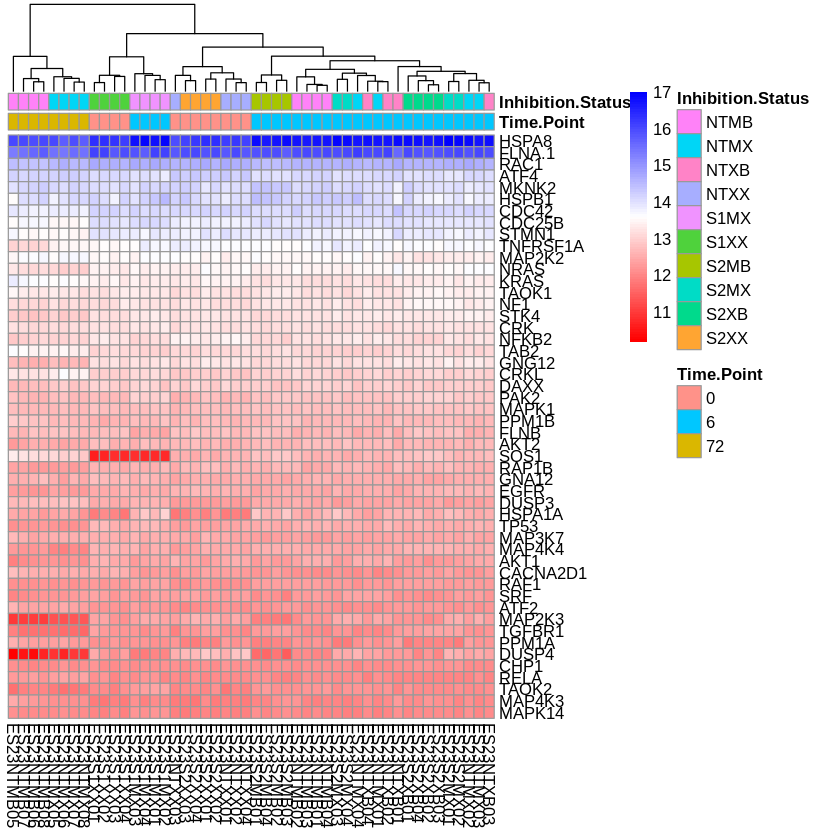

In [57]:
library("pheatmap")
select <- order(rowMeans(counts(dds,normalized=FALSE)),
                decreasing=TRUE)[1:50]
df <- as.data.frame(colData(dds)[,c("Time.Point","Inhibition.Status")])
ntd <- normTransform(dds)
pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=TRUE,
         cluster_cols=TRUE, annotation_col=df, color = colorRampPalette(c("red", "white", "blue"))(100))